# **CosmiCode-Internship**
## **Week-1**

<img src="Images/Deep Learning Internship Module.png" alt="Week-1 Tasks" width="1000"/>

## Task-1: Install TensorFlow/Keras and Pytorch and verify installation

In [9]:
# just hit pip install tensorflow and pytorch in the terminal and it should work, I already got that done so I'll just import them in.
import tensorflow as tf
import torch
import tensorflow.keras as keras # type: ignore
black_text = "\033[30m"
red_text = "\033[31m"
green_text = "\033[32m"
yellow_text = "\033[33m"
blue_text = "\033[34m"
magenta_text = "\033[35m"
cyan_text = "\033[36m"
white_text = "\033[37m"
normal_text_start = "\033[0m"
bold_start = "\033[1m"
dim_start = "\033[2m"
italic_start = "\033[3m"
underline_start = "\033[4m"
blink_start = "\033[5m"
hide_start = "\033[8m"
strike_through_start = "\033[9m"
reset_normal = "\033[0m"

normal_text_start = "\033[0m"


print(f"{green_text}{bold_start}{underline_start}TensorFlow Version:  {tf.__version__}")

print(f"PyTorch Version: {torch.__version__}")

print(f"Keras Version: {keras.__version__} {reset_normal} {green_text}")


TensorFlow Version:  2.17.0
PyTorch Version: 2.3.1+cpu
Keras Version: 3.6.0  


## Task-2: Feed-Forward Neural Network on random data




#### a feed forward neural network is a neural network where data simply moves linearly, from the input nodes to the hidden layer and then to the output nodes. there are no loops etc. We can use it to recognize digits in a dataset (which is what we are about to do).

In [12]:
import numpy as np

# single layer feed-forward NN
model = keras.models.Sequential()    # layers stacked on top of each other
model.add(keras.layers.Input(shape=(10,)))  # Explicit Input layer with 10 features
model.add(keras.layers.Dense(64, activation='relu'))  # the first layer, dense means a fully connected layer (every neuron is connected to every neuron of the previous layer). 64 is the number of neuron in the layer. the input shape is basically the number of features. input shape is only specified in the first layer because that is where the data enters the model
model.add(keras.layers.Dense(32, activation='relu')) # having less neurons forces the model to compress and generalize
model.add(keras.layers.Dense(1, activation='sigmoid')) # binary classification so we only need 1 neuron in our output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate random data for input and output
X_train = np.random.rand(100, 10)   ## 100 rows and 10 columns
y_train = np.random.randint(2, size=(100,))
# Train the model
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5332 - loss: 0.6932
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4748 - loss: 0.7011
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5379 - loss: 0.6881
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5936 - loss: 0.6843 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5799 - loss: 0.6833


### Interpreting the output:
- epoch is one full pass through of the entire dataset. 
- the 4/4 means that we are using four batches to train the data
- the green line is just a progress bar for that specific epoch
- the 4ms/step is just how long one batch takes to process (4 micro seconds in our case)
- the accuracy and loss are also shown after each epoch is complete

## Task-3: Use the MNIST dataset to classify hand-written digits

(60000, 28, 28)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


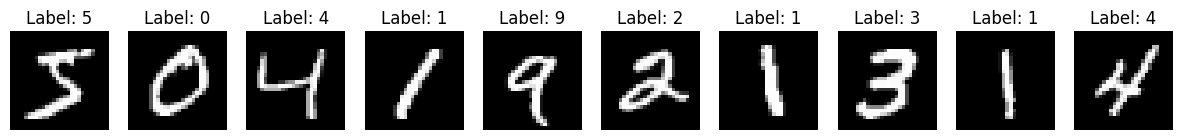

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8817 - loss: 0.4089 - val_accuracy: 0.9656 - val_loss: 0.1077
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9743 - loss: 0.0853 - val_accuracy: 0.9759 - val_loss: 0.0780
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9841 - loss: 0.0498 - val_accuracy: 0.9781 - val_loss: 0.0684
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9898 - loss: 0.0323 - val_accuracy: 0.9791 - val_loss: 0.0687
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9919 - loss: 0.0250 - val_accuracy: 0.9809 - val_loss: 0.0627


In [14]:
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)  # Will output (60000, 28, 28)
print(set(y_train))  # Outputs something like {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Plot the first 10 images from the training set
plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


# Preprocessing the data
# Flattening the 28x28 images into vectors of size 784, and normalizing the values between 0 and 1
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build the model
mnist_model = keras.models.Sequential()
mnist_model.add(keras.layers.Input(shape=(28*28,)))
mnist_model.add(keras.layers.Dense(512, activation='relu'))  # Input and first hidden layer
mnist_model.add(keras.layers.Dense(256, activation='relu'))  # Second hidden layer
mnist_model.add(keras.layers.Dense(10, activation='softmax'))  # Output layer for 10 classes (digits 0-9)

# Compile the model
mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mnist_history = mnist_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))   # we will get 469 total batches since batch size is 128 and we got like 60k data in total


- We start by importing the mnist dataset from TensorFlow Keras. The dataset is split into training and testing sets.
- The images are reshaped from 2D arrays (28x28 pixels) into 1D arrays (size 784) because our neural network requires inputs as flat vectors.
- Normalization is crucial to speed up training. Dividing by 255 ensures the pixel values lie between 0 and 1.
- The labels (0-9 digits) are converted to a one-hot encoded format because this is the format the neural network's output layer expects.

## Task-4: Visualize the accuracy and loss using matplotlib

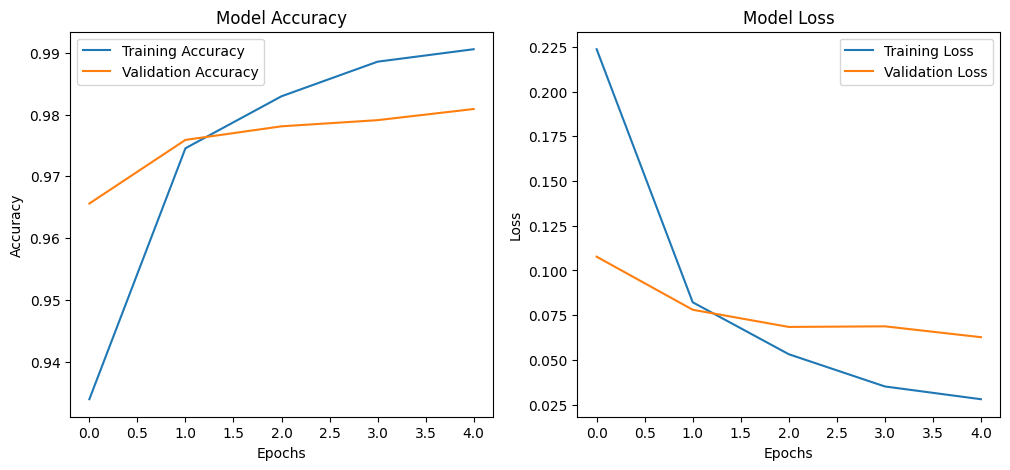

In [15]:
import matplotlib.pyplot as plt

# Plotting the training history (accuracy and loss) over epochs
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(mnist_history.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(mnist_history.history['loss'], label='Training Loss')
plt.plot(mnist_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Task-5: Experiment with different activation functions

In [23]:
# Function to build and return a model with a specified activation function
def build_model_with_activation(activation):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(28*28,)))
    model.add(keras.layers.Dense(512, activation=activation))  # Input and first hidden layer
    model.add(keras.layers.Dense(256, activation=activation))  # Second hidden layer
    model.add(keras.layers.Dense(10, activation='softmax'))  # Output layer for 10 classes (digits 0-9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Different activation functions to try: ReLU, Sigmoid, and Tanh
activation_functions = ['relu', 'sigmoid', 'tanh']

for activation in activation_functions:
    print(f"{red_text}\nTraining with {bold_start}{underline_start}{activation}{normal_text_start}{red_text} activation function {normal_text_start}")
    model = build_model_with_activation(activation)
    model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))



Training with relu activation function 
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8798 - loss: 0.4223 - val_accuracy: 0.9706 - val_loss: 0.1002
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9753 - loss: 0.0848 - val_accuracy: 0.9685 - val_loss: 0.0987
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9828 - loss: 0.0546 - val_accuracy: 0.9759 - val_loss: 0.0775
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9896 - loss: 0.0344 - val_accuracy: 0.9757 - val_loss: 0.0825
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9913 - loss: 0.0262 - val_accuracy: 0.9789 - val_loss: 0.0720

Training with sigmoid activation function 
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7403 - loss: 0.9054 - val_accuracy: 0.9259 - val_loss: 0.2506
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9288 - loss: 0.2344 - val_accuracy: 0.9463 - val_loss: 0.1800
Epoch 3/5
469/469 ━━━━━━━